# Set up

In [1]:
import os
from collections import defaultdict
from pathlib import Path

import pandas as pd
from tqdm import tqdm

# Movie Scripts Dataset

In [4]:
from typing import List, Optional, Tuple

class Script:
    def __init__(self, data_dir: Path, movie_id: str, concat: bool = True):
        self.data_dir = data_dir
        self.movie_id = movie_id
        self.concat = concat
        self.lines = self.load_script()

    def load_script(self) -> List[Tuple[str, str]]:
        fdir = self.data_dir / self.movie_id
        result: List[Tuple[str, str]] = []
        with open(fdir / "script.txt") as script, open(
            fdir / "rule-parse.txt"
        ) as labels:
            if len(script.readlines()) != len(labels.readlines()):
                print(
                    "warning: inconsistent script and label files for movie:",
                    self.movie_id,
                )
            script.seek(0)
            labels.seek(0)
            for line, label in zip(script, labels):
                result.append((label.strip(), line.strip()))
        return result

    def _get_lines(self, label: Optional[str] = None):
        if not self.concat:
            return [line for lab, line in self.lines if lab == label or label is None]
        result: List[str] = []
        prev_lab = None
        for lab, line in self.lines:
            if lab == label or label is None:
                if lab == prev_lab:
                    result[-1] += " " + line
                else:
                    result.append(line)
            prev_lab = lab
        return result

    @property
    def sluglines(self):
        return self._get_lines("S")

    @property
    def descriptions(self):
        return self._get_lines("N")

    @property
    def characters(self):
        return self._get_lines("C")

    @property
    def utterances(self):
        return self._get_lines("D")

    @property
    def utterance_expressions(self):
        return self._get_lines("E")

    @property
    def transitions(self):
        return self._get_lines("T")

    @property
    def metadata(self):
        return self._get_lines("M")

    @property
    def others(self):
        return self._get_lines("O")


DATA_DIR = Path("scripts")

print("Number of movies:", len(os.listdir(DATA_DIR)))

Number of movies: 2660


In [5]:
stat_dict = defaultdict(list)
for movie_id in tqdm(os.listdir(DATA_DIR)):
    script = Script(DATA_DIR, movie_id)
    stat_dict["utterance_count"].append(len(script.utterances))
stat_df = pd.DataFrame(stat_dict)
stat_df.describe()

  3%|▎         | 70/2660 [00:00<00:07, 346.44it/s]

 10%|▉         | 261/2660 [00:00<00:06, 372.06it/s]

 17%|█▋        | 455/2660 [00:01<00:05, 380.08it/s]

 44%|████▍     | 1176/2660 [00:03<00:03, 394.12it/s]

 47%|████▋     | 1258/2660 [00:03<00:03, 394.07it/s]

 53%|█████▎    | 1413/2660 [00:03<00:03, 326.91it/s]

 71%|███████   | 1881/2660 [00:05<00:02, 373.71it/s]

 90%|████████▉ | 2385/2660 [00:06<00:00, 361.07it/s]

 93%|█████████▎| 2463/2660 [00:06<00:00, 372.60it/s]

100%|██████████| 2660/2660 [00:07<00:00, 372.29it/s]


,utterance_count
count,2660.000000
mean,814.197744
std,307.999586
min,0.000000
25%,649.000000
50%,823.000000
75%,994.250000
max,2646.000000


Total number of utterances: 2165766



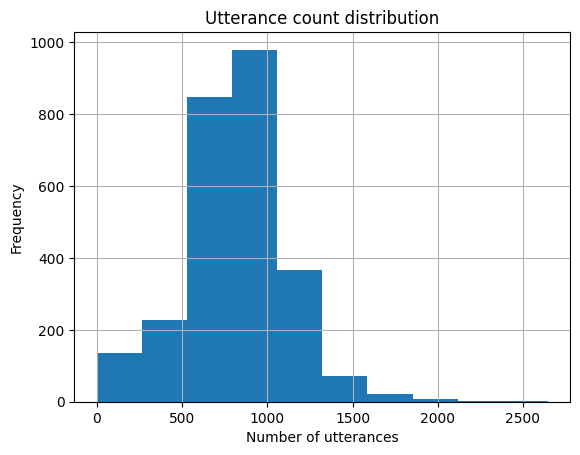

In [6]:
print("Total number of utterances:", stat_df["utterance_count"].sum())
hist = stat_df.hist("utterance_count").item()
hist.set_title("Utterance count distribution")
hist.set_xlabel("Number of utterances")
hist.set_ylabel("Frequency")
print()

In [9]:
for movie_id in tqdm(os.listdir(DATA_DIR)[:3]):
    script = Script(DATA_DIR, movie_id)
    for utterance in script.utterances:
        print(utterance)
    print(".............")

100%|██████████| 3/3 [00:00<00:00, 206.58it/s]

Thin Line Productions, Inc.
CONFUSION! A man and two women plummet towards the pool. SLAM!
to think if God had wanted all women to be happy he would have made all men like me ... until two weeks ago. How did a smart, good lookin' brother end up like this? Truth is ... I guess I'm here 'cause of some I've been doing for a long, long time ... James Brown's IT'S A M..A.N'S WORLD kicks in. CREDITS BEGIN. DISSOLVE TO: 3
handsome young brother's face appears. It's Darnell Wright, 26 years-old. A smile crosses his face. Damn!
I'm a fine muthafucka!
4
{sexy) I think something must be wrong with your pager. so I hope it's okay I called you at home.
You kids be quiet!
Darnell ... so call me.Oh, this is Gwen. 5
An array of condoms: all colors,
Several superfine women sashay down the street.
A19
How you doin'? MA'S
.... sorry Mama, I just wanted to tell you I love you ...... ,I'm gonna drop on by later .... okay ..... bye Mama. Darnell hangs up and dails again.
Yo?
What's up nigga? !
Gettin ready 

# Violent Speeches Dataset

## Construct the dataset

In [ ]:
!python violent_speeches.py

## Post-processing

In [2]:
DATA_DIR = Path("violent_speeches")
RAW_DATA_DIR = DATA_DIR / "raw"
OUT_DATA_PATH = DATA_DIR / "violent_speeches.txt"

file_list = list(RAW_DATA_DIR.glob("*.txt"))
print("Number of movies:", len(file_list))

Number of movies: 2660


In [3]:
count_dict = {"imdbid": [], "count": []}
for fname in file_list:
    with open(fname) as f:
        lines = f.readlines()
    count_dict["imdbid"].append(fname.stem)
    count_dict["count"].append(len(lines))
    with open(OUT_DATA_PATH, "a") as f:
        f.writelines(lines)
count_df = pd.DataFrame(count_dict)

Total number of violent speeches: 116453
Average number of violent speeches per movie: 43.779323308270676
Number of movies without violent speeches: 96



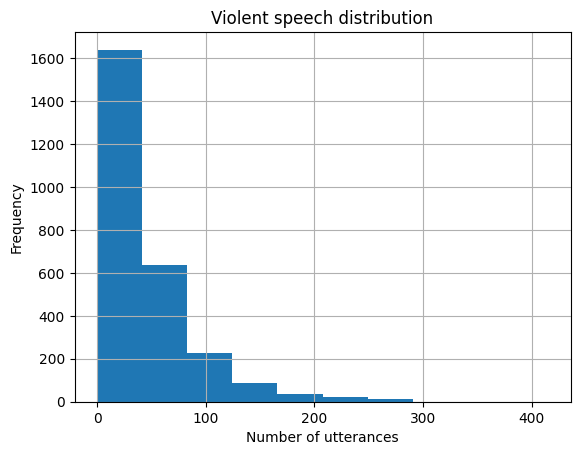

In [7]:
print("Total number of violent speeches:", count_df["count"].sum())
print("Average number of violent speeches per movie:", count_df["count"].mean())
print("Number of movies without violent speeches:", len(count_df[count_df["count"] == 0]))
hist = count_df.hist("count").item()
hist.set_title("Violent speech distribution")
hist.set_xlabel("Number of utterances")
hist.set_ylabel("Frequency")
print()

## Filter violent speeches with LLM

In [90]:
import json
import requests
import threading
from typing import Callable, Dict, List, Optional
from multiprocessing.pool import ThreadPool


class LLMClient:
    def __init__(
        self,
        host: str,
        port: int,
        n: int = 1,
        use_beam_search: bool = False,
        temperature: float = 0,
        max_tokens: int = 10,
        stream: bool = False,
    ):
        self.host = host
        self.port = port
        self.n = n
        self.use_beam_search = use_beam_search
        self.temperature = temperature
        self.max_tokens = max_tokens
        self.stream = stream

    @property
    def server_url(self) -> str:
        return f"http://{self.host}:{self.port}/generate"

    def post_http_request(self, prompt: str) -> requests.Response:
        headers = {"User-Agent": "Test Client"}
        payload = {
            "prompt": prompt,
            "n": self.n,
            "use_beam_search": self.use_beam_search,
            "temperature": self.temperature,
            "max_tokens": self.max_tokens,
            "stream": self.stream,
        }
        response = requests.post(
            self.server_url, headers=headers, json=payload, stream=True
        )
        return response

    def get_outputs(self, response: requests.Response) -> List[str]:
        data = json.loads(response.content)
        output = data["text"]
        return output

    def check_violent_speech(self, speech: str) -> Optional[bool]:
        prompt = (
            "Please determine whether the following speech should be censored in movies for children. Please answer either True or False.\n"
            "Speech: What the fuck?\n"
            "Answer: True\n"
            "Speech: God dammit!\n"
            "Answer: True\n"
            "Speech: I love you.\n"
            "Answer: False\n"
            "Speech: I am hungry.\n"
            "Answer: False\n"
            "Speech: you piece of shit\n"
            "Answer: True\n"
            f"Speech: {speech}\n"
            "Answer: "
        )
        response = self.post_http_request(prompt)
        outputs = self.get_outputs(response)
        outputs = self._extract_llm_responses(prompt, outputs)
        violent_count = 0
        nonviolent_count = 0
        unsure_count = 0
        for output in outputs:
            answer = output.lstrip().lower()
            if answer.startswith("true"):
                violent_count += 1
            elif answer.startswith("false"):
                nonviolent_count += 1
            else:
                unsure_count += 1

        if violent_count > nonviolent_count and violent_count > unsure_count:
            return True
        if nonviolent_count > violent_count and nonviolent_count > unsure_count:
            return False
        if unsure_count > violent_count and unsure_count > nonviolent_count:
            return None
        assert False, "Unreachable"
    
    def paraphrase_violent_speech(self, speech: str) -> str:
        prompt = (
            "Please paraphrase the following speech to make it suitable for children. Make sure that the length of the resulting speech is similar to the original speech.\n"
            f"Speech: {speech}\n"
            "Answer: "
        )
        response = self.post_http_request(prompt)
        outputs = self.get_outputs(response)
        outputs = self._extract_llm_responses(prompt, outputs)
        return outputs

    def _extract_llm_responses(self, prompt: str, outputs: List[str]) -> List[str]:
        return [output[len(prompt) :] for output in outputs]
    

def init_thread(clients: Dict[str, LLMClient], constructor: Callable[[], LLMClient]) -> None:
    clients[threading.get_ident()] = constructor()


def check_violent_speech(clients: Dict[str, LLMClient], speech: str, counter: List[int]) -> Optional[bool]:
    counter[0] += 1
    if counter[0] % 100 == 0:
        print(f"Processed {counter[0]} speeches", flush=True)
    client = clients[threading.get_ident()]
    return client.check_violent_speech(speech)


DATA_DIR = Path("violent_speeches")
DATA_PATH = DATA_DIR / "violent_speeches.txt"

In [91]:
with open(DATA_PATH) as f:
    speeches = [line.strip() for line in f]

In [ ]:
thread_clients = {}
counter = [0]
with ThreadPool(8, initializer=init_thread, initargs=(thread_clients, lambda: LLMClient("143.248.188.103", 8440))) as pool:
    is_violent_list = pool.starmap(check_violent_speech, ((thread_clients, s, counter) for s in speeches))
violent_speeches = []
false_positives = []
uncertain = []
for speech, is_violent in zip(speeches, is_violent_list):
    if is_violent is None:
        uncertain.append(speech)
    elif is_violent:
        violent_speeches.append(speech)
    else:
        false_positives.append(speech)
print("Violent speech count:", len(violent_speeches))
print("False positive count:", len(false_positives))
print("Uncertain count:", len(uncertain))

In [ ]:
with open(DATA_DIR / "violent_speeches_filtered.txt", "w") as f:
    f.write("\n".join(violent_speeches))
with open(DATA_DIR / "violent_speeches_removed.txt", "w") as f:
    f.write("\n".join(false_positives))
with open(DATA_DIR / "violent_speeches_uncertain.txt", "w") as f:
    f.write("\n".join(uncertain))